In [ ]:
# 0. Alapcsomagok
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.cuda.device_count()

1

In [ ]:
print("IS cuda available in your Device  ?  : ",torch.cuda.is_available())
print("Count of Available CUDA Device       : ",torch.cuda.device_count())

IS cuda available in your Device  ?  :  True
Count of Available CUDA Device       :  1


In [ ]:
# Tensor létrehozás
x = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)
y = torch.tensor([[2., 0.], [0., 2.]])
z = x + y

print("Z tensor:\n", z)
print("Z shape:", z.shape)

# Műveletek
w = z @ torch.eye(2)  # mátrixszorzás
print("Mátrixszorzás eredménye:\n", w)

# Deriválás
out = w.mean()
out.backward()
print("Gradient x-re:\n", x.grad)

Z tensor:
 tensor([[3., 2.],
        [3., 6.]], grad_fn=<AddBackward0>)
Z shape: torch.Size([2, 2])
Mátrixszorzás eredménye:
 tensor([[3., 2.],
        [3., 6.]], grad_fn=<MmBackward0>)
Gradient x-re:
 tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


Generáljunk random adatokat a következő függvénnyel:        f(x) = 10*sin(x*2)+5 + zaj

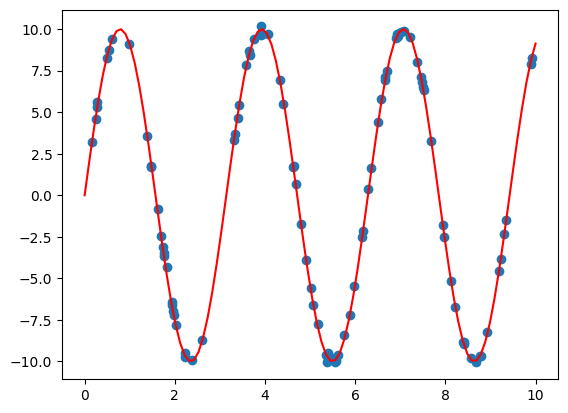

In [ ]:
X1=np.linspace(0,10,100)
X=np.random.random(100)*10
zaj=np.random.randn(100)
y1=10*np.sin(X1*2)

Y= 10*np.sin(X*2) +zaj*0.15

plt.plot(X1,y1,color="r")
plt.scatter(X,Y)

In [ ]:
class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.p2 = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.p2(x)

In [ ]:
epoch=5
model=MLP1()
criterion=nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr = 0.0008,nesterov=True,momentum=0.9)
optimizer=optim.Adam(model.parameters(),lr=0.01)
#sch=torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.9,)


In [ ]:
X_t=torch.tensor(X,dtype=torch.float32).reshape(-1,1)
Y_t=torch.tensor(Y,dtype=torch.float32).reshape(-1,1)

In [ ]:
X_t.shape

torch.Size([100, 1])

In [ ]:
epoch=1000
losses=[]
model.train()
for i in range(1,epoch):
  optimizer.zero_grad()
  outputs= model(X_t)
  loss=criterion(outputs,Y_t)
  loss.backward()
  optimizer.step()
  print(loss.item())
  losses.append(loss.item())
  #if(i%100==0):sch.step()

51.6981086730957
52.57997131347656
65.70764923095703
52.36811065673828
50.604759216308594
50.25619125366211
49.897972106933594
49.38593292236328
48.85740661621094
48.43678665161133
48.34953689575195
48.53972244262695
48.604923248291016
48.464908599853516
48.280731201171875
48.17747116088867
48.11040115356445
48.0121955871582
47.89909744262695
47.78504943847656
47.64730453491211
47.493614196777344
47.25065612792969
47.00577163696289
46.806678771972656
46.55775833129883
46.215660095214844
45.838783264160156
45.509674072265625
45.3309211730957
44.93694305419922
44.3736572265625
44.231380462646484
43.815086364746094
43.39338302612305
43.34306335449219
42.872318267822266
42.461368560791016
42.352500915527344
42.18865203857422
41.89426803588867
41.579627990722656
41.41943359375
41.33695983886719
41.00056076049805
40.74928283691406
40.65946960449219
40.4682502746582
40.36155319213867
40.183406829833984
39.89577102661133
39.758907318115234
39.629173278808594
39.486114501953125
39.6395797729492

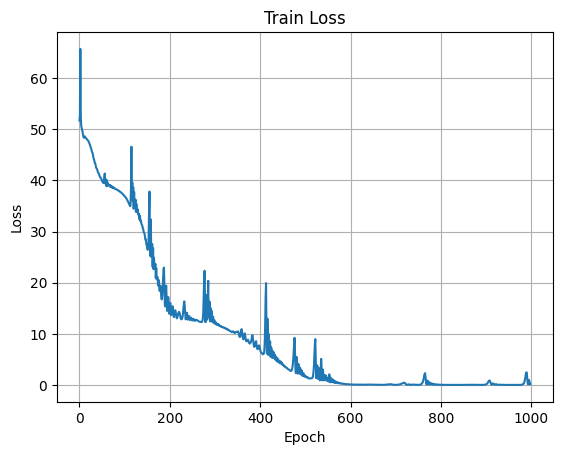

In [ ]:
plt.plot(losses)
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

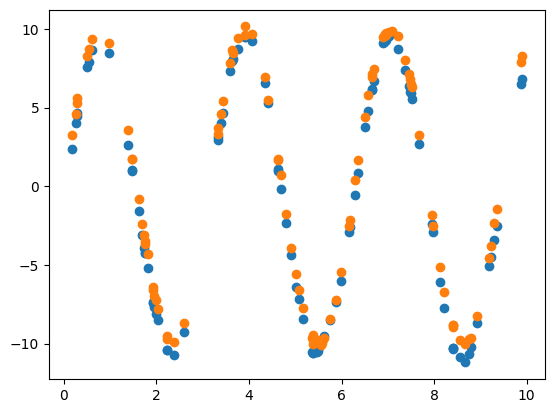

In [ ]:
preds=model(X_t)
plt.scatter(X,preds.detach().reshape(-1))
plt.scatter(X,Y)

In [ ]:
# Transzformációk
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Betöltés
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.22MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.7MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.94MB/s]


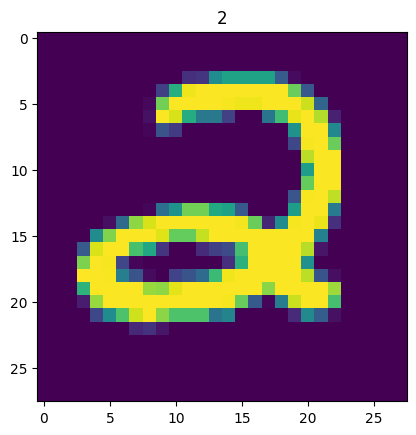

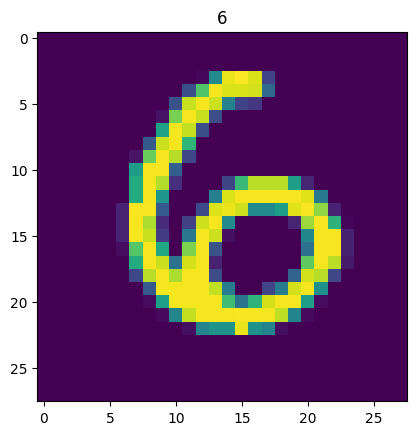

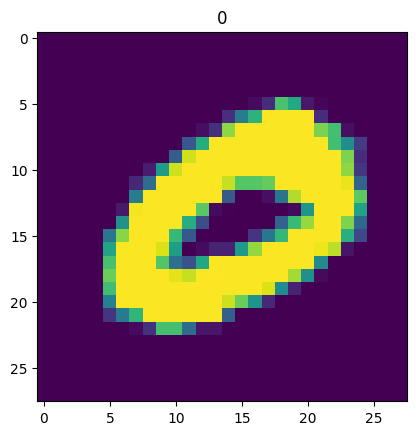

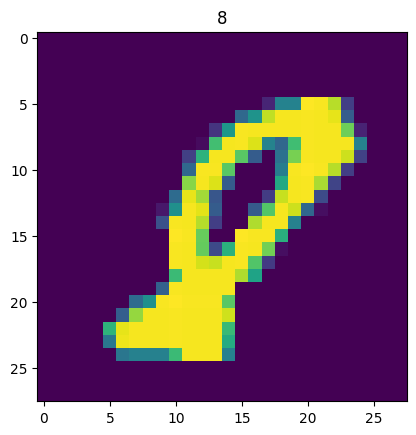

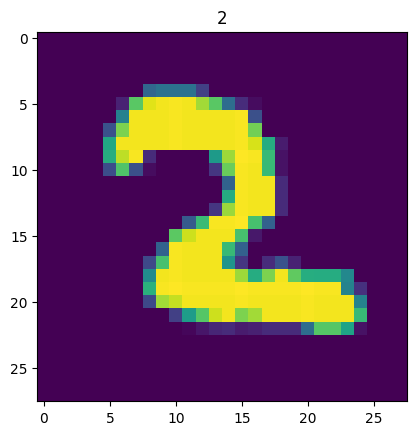

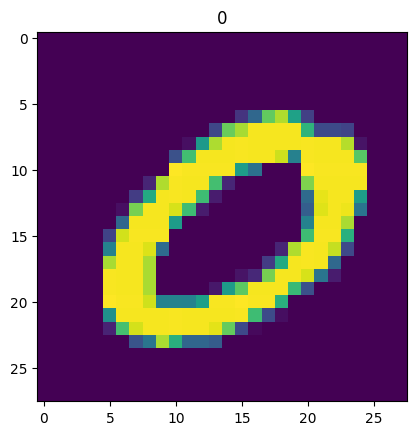

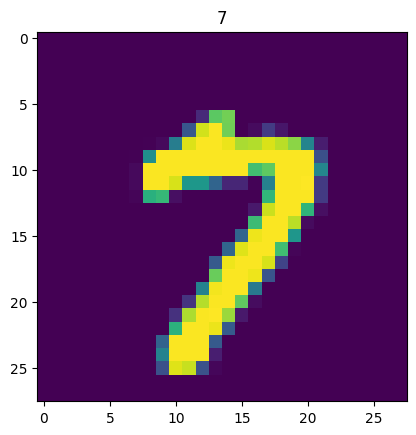

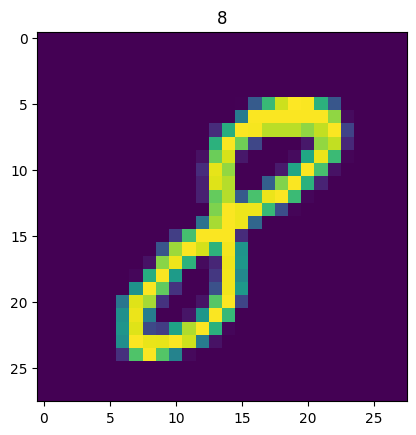

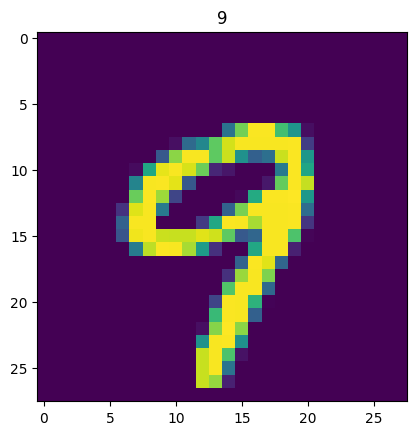

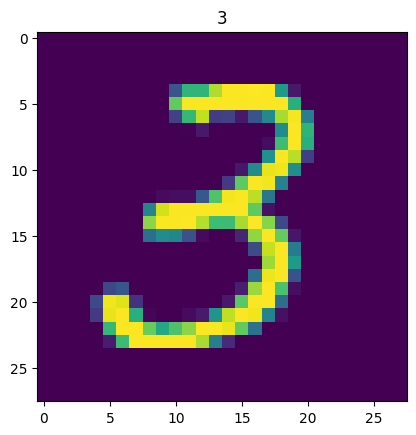

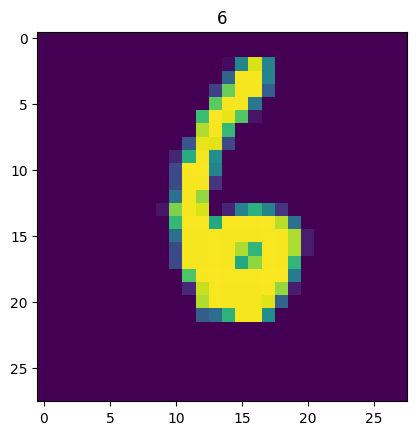

In [ ]:
for i, data in enumerate(train_loader,0):
  plt.imshow(data[0][0][0])
  plt.title(data[1][0].item())
  plt.show()

  if(i==10):break

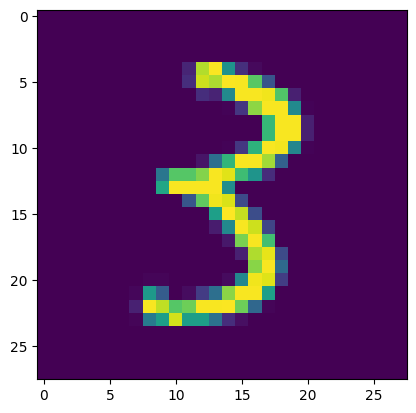

In [ ]:
plt.imshow(data[0][0][0])

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.layers(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/5, Loss: 0.3809
Epoch 2/5, Loss: 0.1828
Epoch 3/5, Loss: 0.1340


KeyboardInterrupt: 

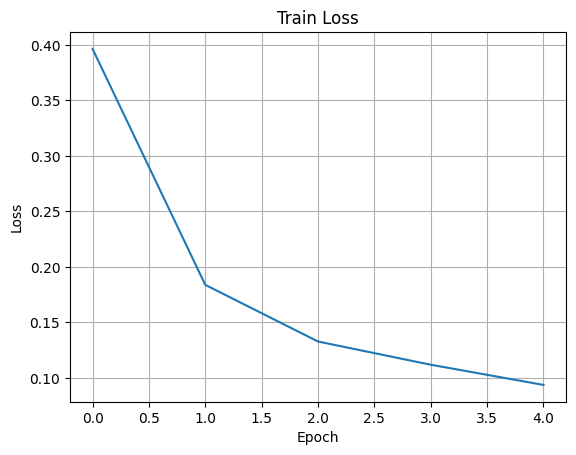

In [ ]:
plt.plot(train_losses)
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total
def pred(model, dataloader):
    model.eval()
    pr=[]
    ys=[]
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            pred=model(images)
            preds = torch.argmax(pred, dim=1)
            pr.append(preds)
            ys.append(labels)
    return torch.cat(pr),torch.cat(ys)

#print(f"Test Accuracy: {acc * 100:.2f}%")

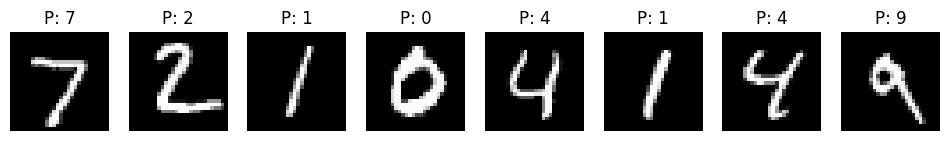

In [ ]:
examples = iter(test_loader)
images, labels = next(examples)
images, labels = images[:8], labels[:8]
outputs = model(images.to(device))
preds = torch.argmax(outputs, dim=1)

plt.figure(figsize=(12, 2))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(images[i][0], cmap="gray")
    plt.axis('off')
    plt.title(f"P: {preds[i].item()}")
plt.show()

NameError: name 'pred' is not defined

In [ ]:
y_pred,y_true=pred(model,test_loader)

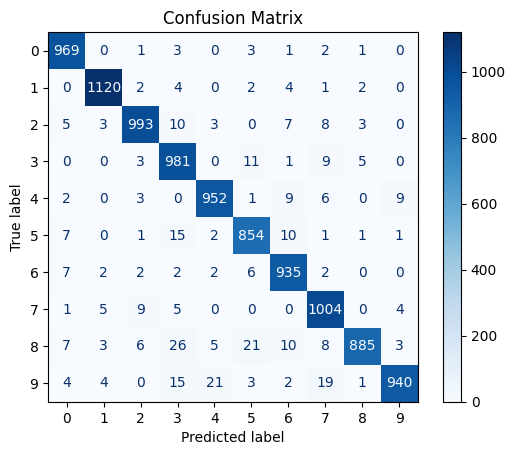

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_true: valódi címkék
# y_pred: a modell által prediktált címkék
# Ezek lehetnek például torch tensorból konvertált numpy tömbök

# Például:
# y_true = labels.cpu().numpy()
# y_pred = preds.cpu().numpy()

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")  # választható colormap
plt.title("Confusion Matrix")
plt.show()

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.4914, 0.4822, 0.4465),  # RGB csatornák átlaga
     #                    (0.2470, 0.2435, 0.2616))  # RGB csatornák szórása
])

# CIFAR-10 betöltése
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# DataLoader létrehozása
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',' truck' )

100%|██████████| 170M/170M [00:03<00:00, 48.0MB/s]


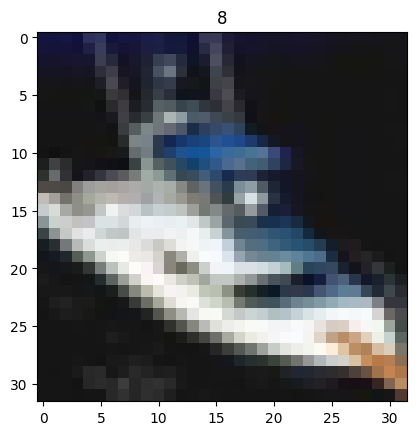

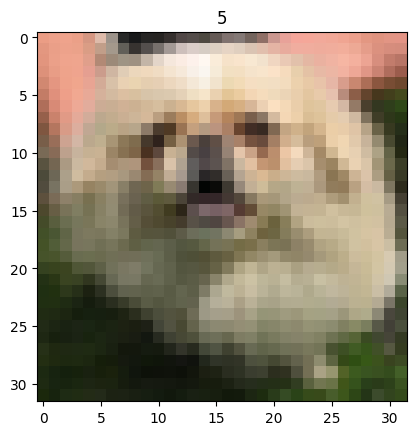

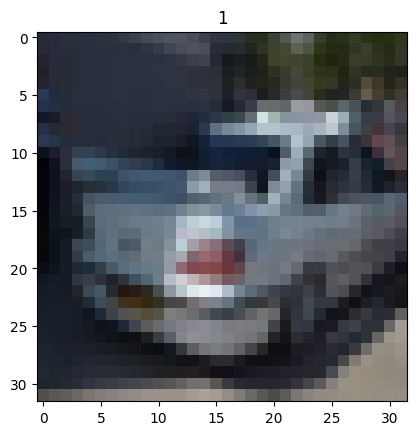

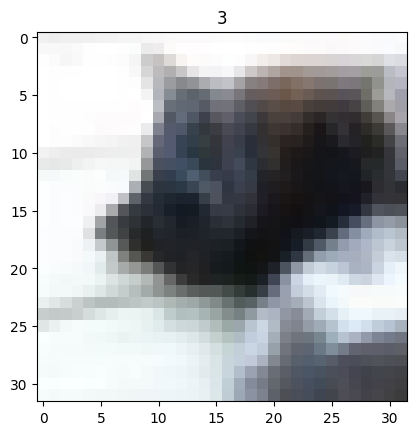

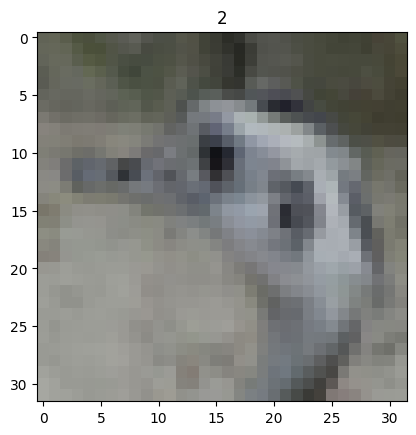

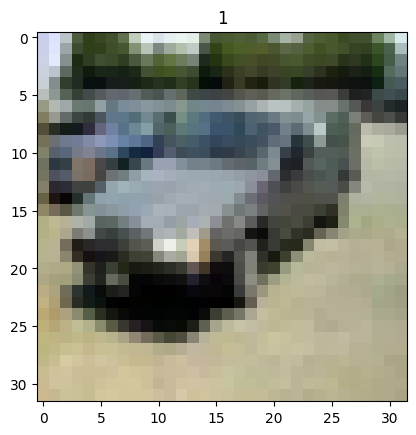

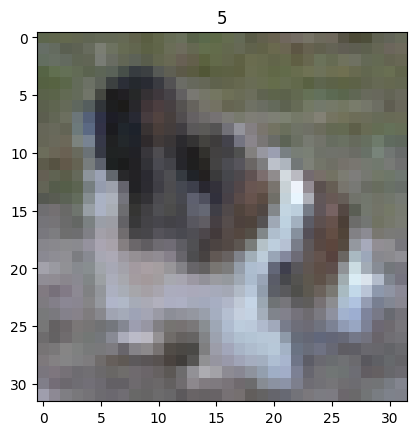

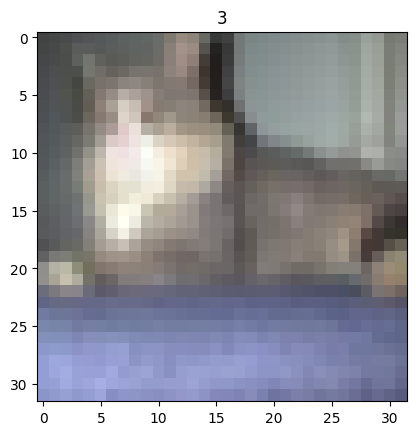

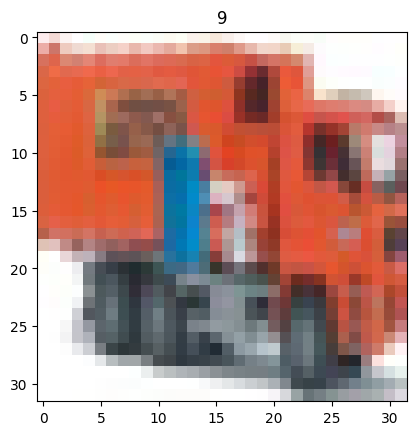

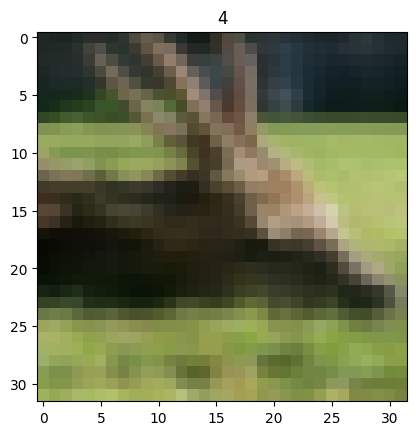

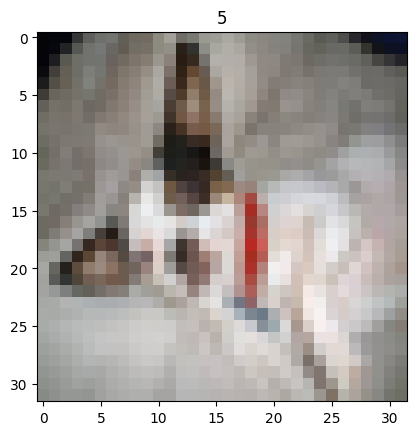

In [ ]:
import PIL
for i, data in enumerate(train_loader):

  plt.imshow(data[0][0].permute(1, 2, 0))
  plt.title(data[1][0].item())
  plt.show()

  if(i==10):break

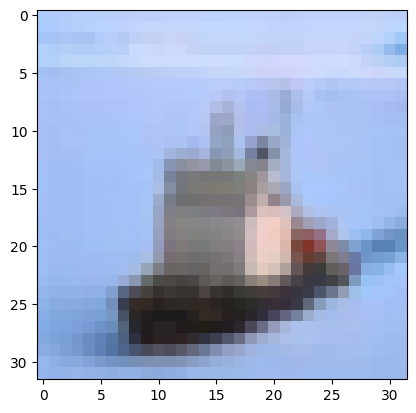

In [ ]:
plt.imshow(data[0][1].permute(1, 2, 0))


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        return self.layers(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 15
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/15, Loss: 1.8502
Epoch 2/15, Loss: 1.6650
Epoch 3/15, Loss: 1.5691
Epoch 4/15, Loss: 1.5099
Epoch 5/15, Loss: 1.4595
Epoch 6/15, Loss: 1.4301
Epoch 7/15, Loss: 1.3941
Epoch 8/15, Loss: 1.3660
Epoch 9/15, Loss: 1.3383
Epoch 10/15, Loss: 1.3135
Epoch 11/15, Loss: 1.2902
Epoch 12/15, Loss: 1.2701
Epoch 13/15, Loss: 1.2477
Epoch 14/15, Loss: 1.2256
Epoch 15/15, Loss: 1.2071


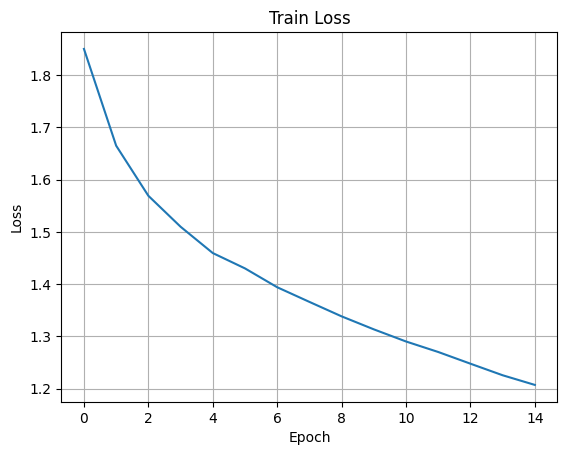

In [ ]:
plt.plot(train_losses)
plt.title("Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
evaluate(model,test_loader)

0.513

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1=nn.Conv2d(3,16,3,padding="same")
        self.c2=nn.Conv2d(16,32,3,padding="same")
        self.c3=nn.Conv2d(32,32,3,padding="same")
        self.mp=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(32*8*8,10)
        self.relu=nn.ReLU()

    def forward(self,x):
        x=self.c1(x)
        x=self.relu(x)
        x=self.c2(x)
        x=self.relu(x)
        x=self.mp(x)
        x=self.c3(x)
        x=self.relu(x)
        x=self.mp(x)
        #print(x.shape)
        x=torch.flatten(x,start_dim=1)
        x=self.fc1(x)
        return x

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:

class ES():
  def __init__(self,strt_acc,max_ep,path,mdl):
    self.acc0=strt_acc
    self.max_ep=max_ep
    self.ep=0
    self.path=path
    self.mdl=mdl

  def step(self,acc_s):
    self.ep+=1
    if(acc_s>self.acc0):
      self.acc0=acc_s
      self.ep=0
      torch.save(self.mdl,self.path)
      return False

    elif(self.ep>self.max_ep):
      return True

    else:
      return False


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
#cnn=CNN().to(device)
cnn=torch.load("cnn.pt",map_location=device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.AdamW(cnn.parameters(),lr=0.001)
es=ES(0,5,"cnn.pt",cnn)



for i in range(10):
  total_loss=0
  cnn.train()
  for batch in train_loader:
    images,labels=batch
    images,labels=images.to(device),labels.to(device)
    optimizer.zero_grad()
    outputs=cnn(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    total_loss+=loss.detach().cpu().item()

  avg_loss=total_loss/len(train_loader)
  print(f"Epoch {i+1}/{10}, Loss: {avg_loss:.4f}")


  cnn.eval()
  with torch.no_grad():
    for batch in test_loader:
      images,labels=batch
      images,labels=images.to(device),labels.to(device)
      outputs=cnn(images)
      preds=torch.argmax(outputs,dim=1)
      correct=(preds==labels).sum().item()
      total=labels.size(0)
  print(f"Test Accuracy: {correct/total*100:.2f}%")
  if(es.step(correct/total*100)):break


Epoch 1/10, Loss: 1.5386
Test Accuracy: 54.70%
Epoch 2/10, Loss: 1.1878
Test Accuracy: 60.70%
Epoch 3/10, Loss: 1.0125
Test Accuracy: 65.20%
Epoch 4/10, Loss: 0.9087
Test Accuracy: 66.60%
Epoch 5/10, Loss: 0.8459
Test Accuracy: 68.30%
Epoch 6/10, Loss: 0.7980
Test Accuracy: 68.50%
Epoch 7/10, Loss: 0.7608
Test Accuracy: 70.10%
Epoch 8/10, Loss: 0.7311
Test Accuracy: 68.30%
Epoch 9/10, Loss: 0.7079
Test Accuracy: 69.90%
Epoch 10/10, Loss: 0.6826
Test Accuracy: 71.80%


In [ ]:
torch.flatten(torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]]))

tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
131072/64

2048.0

In [ ]:
!ls "/gdrive/MyDrive/MATPROGCSOM"

 01_bevezetes_linearis_regresszio.ipynb
 DL0.ipynb
'MAF II. - Első gyakorlat (Csüt).ipynb'
'MAF II. - Első gyakorlat (Kedd).ipynb'
'MAF II. - Második gyakorlat (Kedd) - SymPy.ipynb'
'MAF II. - Második gyakorlat (Kedd) - SymPy (Megoldások).ipynb'


In [ ]:
ls !

cnn.pt	data  sample_data


In [ ]:
import shutil
shutil.copy("cnn.pt", "/gdrive/MyDrive/MATPROGCSOM/cnn.pt")

'/gdrive/MyDrive/MATPROGCSOM/cnn.pt'

In [ ]:
asd=torch.load("cnn.pt",weights_only=False)

In [ ]:
asd(torch.randn(1,3,32,32).to(device))

tensor([[-12.2340,   9.4305, -26.4573, -24.7329, -27.7492, -34.6244,   4.7071,
         -27.7704, -17.4742,  22.5778]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
evaluate(asd,test_loader)

0.7239